In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import skew
%matplotlib inline

In [2]:
## dataset file
pulsar_dataset = '/home/d.dasarathan/ds5500/projects/datasets/HTRU2/HTRU_2.csv'

In [3]:
## read dataset
df_main = pd.read_csv(pulsar_dataset, header=None)

In [4]:
## display sample dataset
df_main.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### Column names 
1. Mean of the integrated profile (mean_int_pf).
2. Standard deviation of the integrated profile (std_pf).
3. Excess kurtosis of the integrated profile (ex_kurt_pf).
4. Skewness of the integrated profile (skew_pf).
5. Mean of the DM-SNR curve (mean_dm).
6. Standard deviation of the DM-SNR curve (std_dm).
7. Excess kurtosis of the DM-SNR curve (kurt_dm).
8. Skewness of the DM-SNR curve (skew_dm).
9. Label ( For real pulsars, the class label is 1; otherwise, the class label is 0)

In [5]:
## add column names to dataset
col_names = ['mean_int_pf', 'std_pf', 'ex_kurt_pf', 'skew_pf', 'mean_dm', 'std_dm', 'kurt_dm', 'skew_dm','label']
df_main.columns = col_names
df_main.head()

,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
df_main.describe()

,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,label
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [7]:
## check for none in dataset
df_main.isna().sum()

mean_int_pf    0
std_pf         0
ex_kurt_pf     0
skew_pf        0
mean_dm        0
std_dm         0
kurt_dm        0
skew_dm        0
label          0
dtype: int64

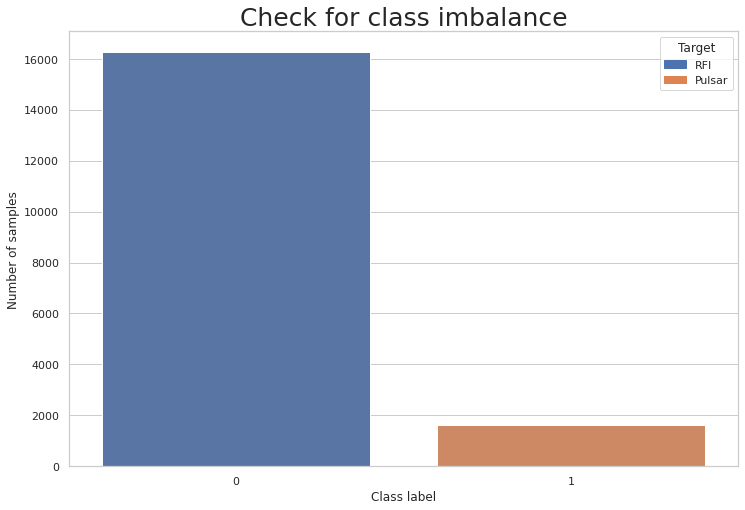

In [8]:
## plot class label bar chart
objects = ('RFI', 'Pulsar')
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_style("whitegrid")
ax = sns.countplot(x="label", data=df_main)
ax.set_xlabel("Class label")
ax.set_ylabel("Number of samples")
ax.set_title("Check for class imbalance", fontsize=25)

patches = [Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in ax.get_xticklabels())]

plt.legend(title='Target', labels=objects, handles=patches, loc="upper right")
plt.savefig("../visuals/class_imbalance.png")
plt.show()

mean_int_pf
-1.3750723905207278


<Figure size 864x648 with 0 Axes>

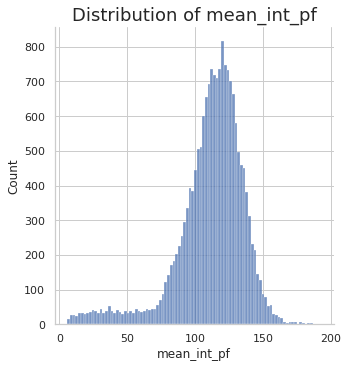

std_pf
0.1266304634037971


<Figure size 864x648 with 0 Axes>

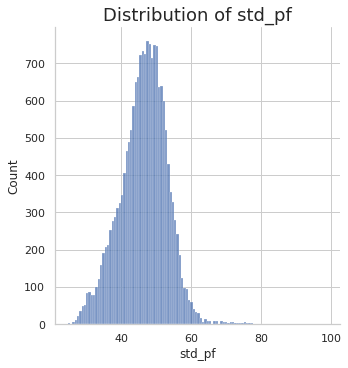

ex_kurt_pf
3.6381047281725745


<Figure size 864x648 with 0 Axes>

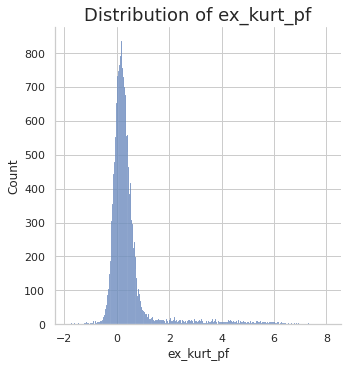

skew_pf
5.180859198774812


<Figure size 864x648 with 0 Axes>

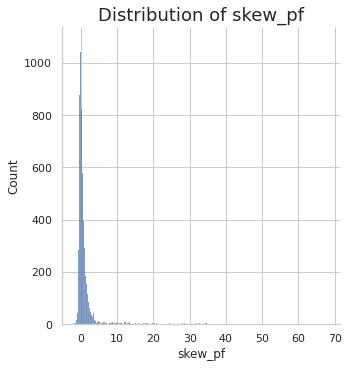

mean_dm
3.6829934238565114


<Figure size 864x648 with 0 Axes>

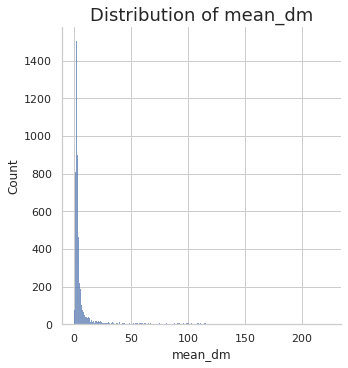

std_dm
1.894095372422393


<Figure size 864x648 with 0 Axes>

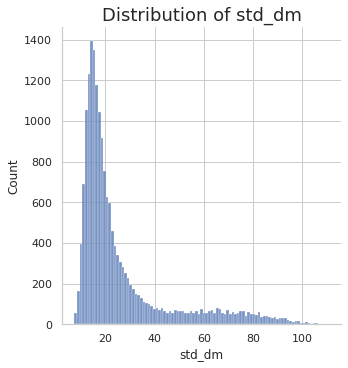

kurt_dm
0.4414638629012641


<Figure size 864x648 with 0 Axes>

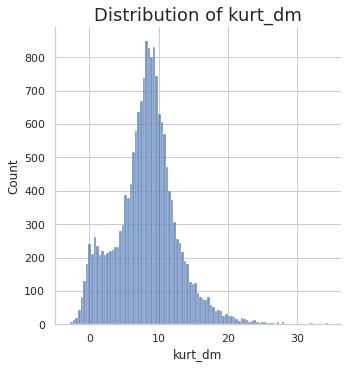

skew_dm
2.734284379273907


<Figure size 864x648 with 0 Axes>

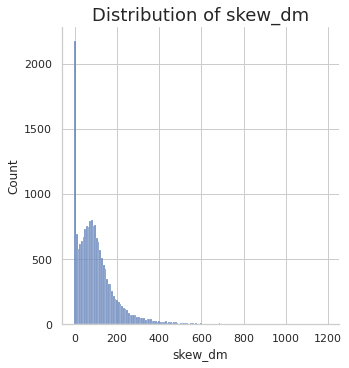

In [9]:
## check for skewness
for col in df_main.iloc[: , :-1]:
    print(col)
    print(skew(df_main[col]))
    
    plt.figure(figsize=(12, 9))
    sns.displot(df_main[col])
    plt.title('Distribution of '+str(col), fontsize=18)
    plt.savefig('../visuals/distribution_'+str(col)+'.png')
    plt.show()
    

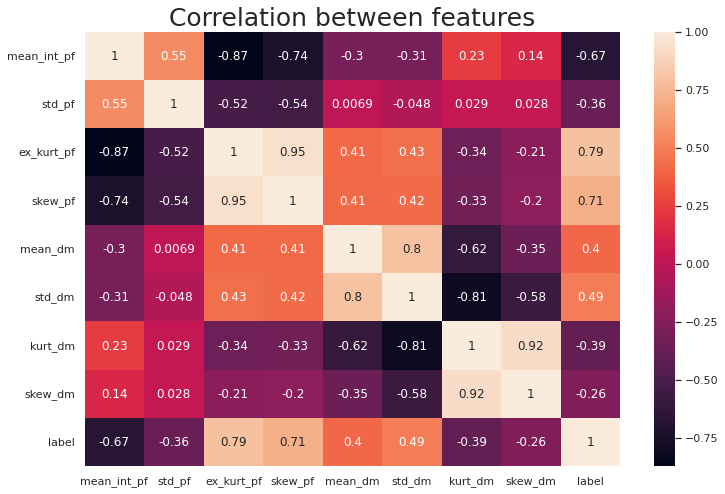

In [10]:
## Correlation matrix
sns.heatmap(df_main.corr(),annot=True)
plt.title('Correlation between features', fontsize=25)
plt.savefig("../visuals/correlation_matrix.png")
plt.show()